Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
x_train Shape:  (55000, 784)
y_train Shape:  (55000, 10)
x_test Shape:  (10000, 784)
y_test Shape:  (10000, 10)


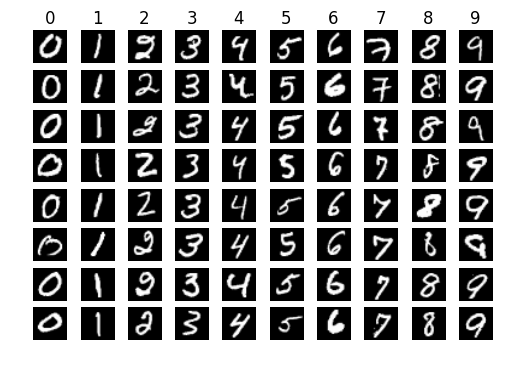

In [1]:
#-*- coding: utf-8 -*-
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # Yann LeCun's website에서 MNIST 다운

# MNIST 객체로부터 데이터를 얻어온다.
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

print("x_train Shape: ", x_train.shape)
print("y_train Shape: ", y_train.shape)
print("x_test Shape: ", x_test.shape)
print("y_test Shape: ", y_test.shape)


import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_mnist(data, classes, incorrect=None):
    
    for i in range(10):
        idxs = (classes == i) #조건에 맞는 index만 True 나머지는 False로 리턴된다.
        # 클래스 i에 해당하는 10개의 데이터
        
        if incorrect is not None:
            idxs *= incorrect
        
        images = data[idxs][0:10] #True조건을 만족하는 index로 data를 뽑고 그 중 10개를 뽑는다.
            
        for j in range(8):   
            plt.subplot(8, 10, i + j*10 + 1) # 행, 열, plot번호
            plt.imshow(images[j].reshape(28, 28), cmap='gray')
            # 클래스당 타이틀 표시
            if j == 0:
                plt.title(i)
            plt.axis('off')
    plt.show()

classes = np.argmax(y_train, 1) # [7 3 4 ..., 5 6 8] 형태로 출력된다.
plot_mnist(x_train, classes)

In [2]:
import tensorflow as tf

#### Computational Graph 셋팅 시작 ####
x = tf.placeholder(tf.float32, [None, 784])  # 데이터 담을 placeholder 선언
y_ = tf.placeholder(tf.float32, [None, 10]) # True Label 값

W = tf.Variable(tf.zeros([784, 10])) # 학습할 Weight Matrix
b = tf.Variable(tf.zeros([10])) # 학습할 bias

y = tf.nn.softmax(tf.matmul(x, W) + b) # 예측 Label 값


cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1])) # Loss

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
#### Computational Graph 셋팅 끝 ####

In [3]:
init = tf.global_variables_initializer() # 변수 초기화(텐서플로우 필수과정)

sess = tf.Session() # 세션 열기
sess.run(init) # 초기화

[[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
accurcay:
0.9149
Incorrect Prediction Case


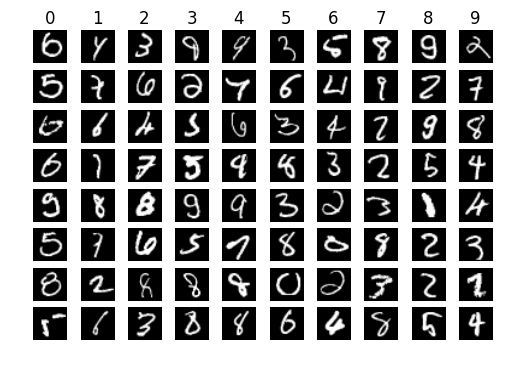

In [4]:
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100) # train, validation, test 에 데이터가 들어가 있음 #  return self._images[start:end], self._labels[start:end]
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

#### 테스트를 위한 Computational Graph 셋팅 시작 #### (꼭 이 자리가 아니고 위에 선언되도 괜찮음)
prediction = tf.argmax(y, 1)
target = tf.argmax(y_, 1)

correct_prediction = tf.equal(prediction, target) # argmax(input,  dimension of the input Tensor to reduce across)
incorrect_predidction = tf.not_equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#### 테스트를 위한 Computational Graph 셋팅 끝 ####

print(mnist.test.labels) # Label data가 어떻게 생겼는지 확인 (Ont-hot representation)

acc, pred, incorrect_pred = sess.run([accuracy, prediction, incorrect_predidction], feed_dict={x: mnist.test.images, y_: mnist.test.labels})
print("accurcay:")
print(acc)

print("Incorrect Prediction Case")
plot_mnist(mnist.test.images, classes=pred, incorrect=incorrect_pred)